### Exercise #7 

David Perry, sez326

Chapter 8 Tree-Based Methods

Exercises 3, 8, and 9.

### Preprocessing

In [563]:
# import relevant statistical packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [564]:
# import data visualisation packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from io import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [565]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [566]:
from sklearn.model_selection import train_test_split
from ISLP.bart import BART

### Exercise 8.4.3

Consider the Gini index, classifcation error, and entropy in a simple classifcation setting with two classes. Create a single plot that displays each of these quantities as a function of pˆm1. The x-axis should display pˆm1, ranging from 0 to 1, and the y-axis should display the value of the Gini index, classifcation error, and entropy.

Hint: In a setting with two classes, pˆm1 = 1 − pˆm2. You could make this plot by hand, but it will be much easier to make in R.

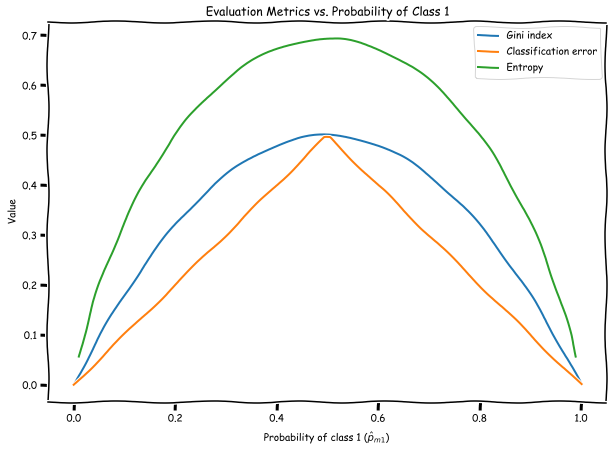

In [567]:
# Probability of class 1 ranging from 0 to 1
pm1 = np.linspace(0, 1, 100)

# Calculate Gini index
gini = 2 * pm1 * (1 - pm1)

# Calculate classification error
err = np.minimum(pm1, 1 - pm1)

# Calculate entropy
pm2 = 1 - pm1
entropy = - (pm1 * np.log(pm1) + pm2 * np.log(pm2))

# Plot
plt.figure(figsize=(10, 7))
plt.plot(pm1, gini, label='Gini index')
plt.plot(pm1, err, label='Classification error')
plt.plot(pm1, entropy, label='Entropy')

plt.xlabel('Probability of class 1 ($\hat{p}_{m1}$)')
plt.ylabel('Value')
plt.title('Evaluation Metrics vs. Probability of Class 1')
plt.legend()
plt.grid(True)

plt.show()

### Applied Exercise #8.4.8

In the lab, a classifcation tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.

In [568]:
# import Carseats data
from ISLP import load_data
df = load_data("Carseats")
df.Sales = df.Sales.map(lambda x: 0 if x<=8 else 1)
df.ShelveLoc = pd.factorize(df.ShelveLoc)[0]
df.Urban = df.Urban.map({'No':0, 'Yes':1})
df.US = df.US.map({'No':0, 'Yes':1})

In [569]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


### 8.4.8.a. 

Splitting the data set into training and test data set

In [570]:
X = df.drop(['Sales'], axis = 1)
y = df.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, test_size = 0.3, random_state = 0)

### 8.4.8.b. 

Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

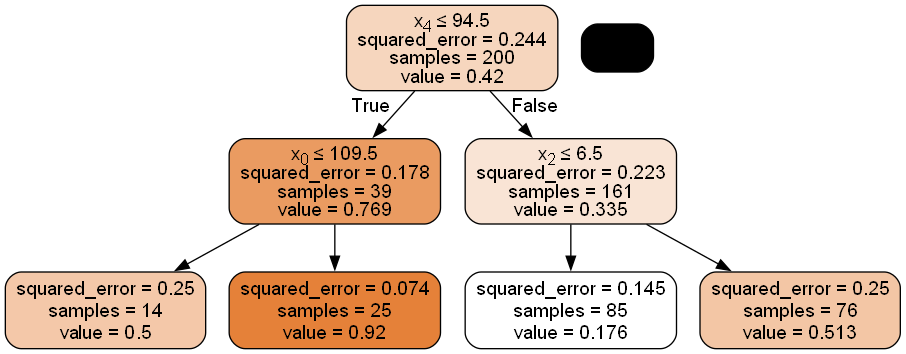

In [571]:
tree_cs = DecisionTreeRegressor(max_depth = 2).fit(X_train, y_train)

dot_data = StringIO()

export_graphviz(tree_cs, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=250000)

Mean Squared Error:  0.2158895985296514


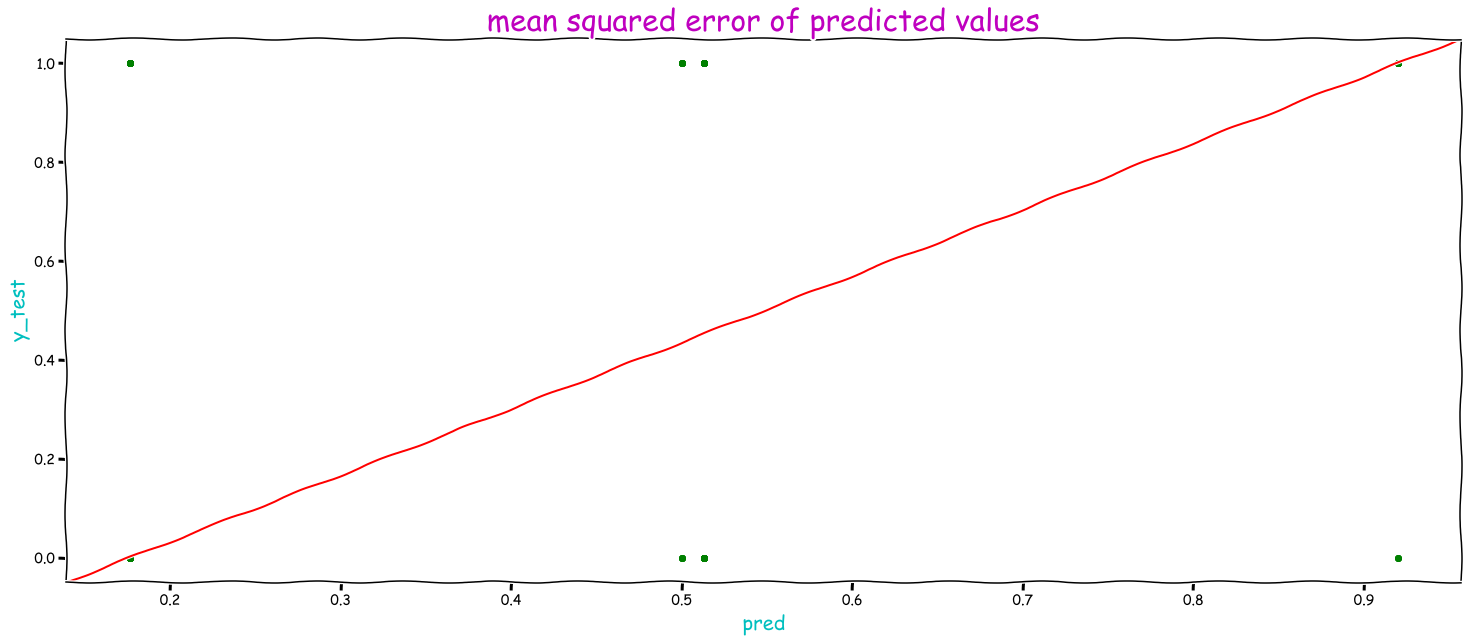

In [572]:
pred = tree_cs.predict(X_test)

plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(pred, y_test, label = 'medv', color='g')
plt.plot([0, 1], [0, 1], 'r', transform = plt.gca().transAxes)

plt.xlabel('pred', color='c', fontsize=20)
plt.ylabel('y_test', color='c', fontsize=20)
plt.title('mean squared error of predicted values', fontsize=30, color='m')

print("Mean Squared Error: ", mean_squared_error(y_test, pred))

**Therefore, the test MSE$\approx$0.22**

### 8.4.8.c.

Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

In [573]:
SCORES = []
max_leafs_arr = range(2, 50)
for max_leafs in max_leafs_arr:
    regressionTree = DecisionTreeRegressor(max_leaf_nodes=max_leafs)
    sc = cross_val_score(regressionTree, X, y, cv=10, scoring="neg_mean_squared_error")
    SCORES.append((-sc.mean(), sc.std()))
SCORES = np.array(SCORES)

The best tree has 15 leafs.


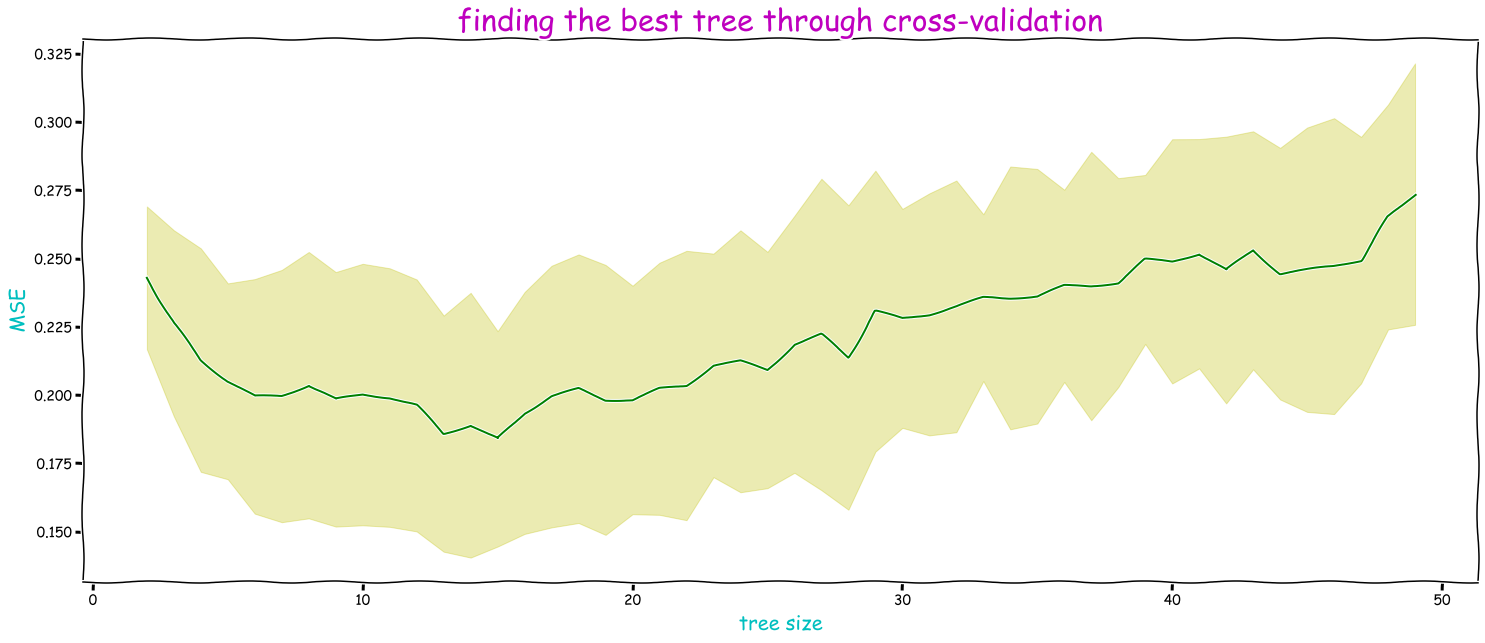

In [574]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(max_leafs_arr, SCORES[:,0], 'g')
plt.fill_between(max_leafs_arr, SCORES[:,0]+SCORES[:,1], SCORES[:,0]-SCORES[:,1], alpha=0.3, color='y')
plt.xlabel('tree size', fontsize=20, color='c')
plt.ylabel('MSE', fontsize=20, color='c')
plt.title('finding the best tree through cross-validation', fontsize=30, color='m')
best_min_leafs = max_leafs_arr[np.argmin(SCORES[:,0])]
print(f"The best tree has {best_min_leafs} leafs.")

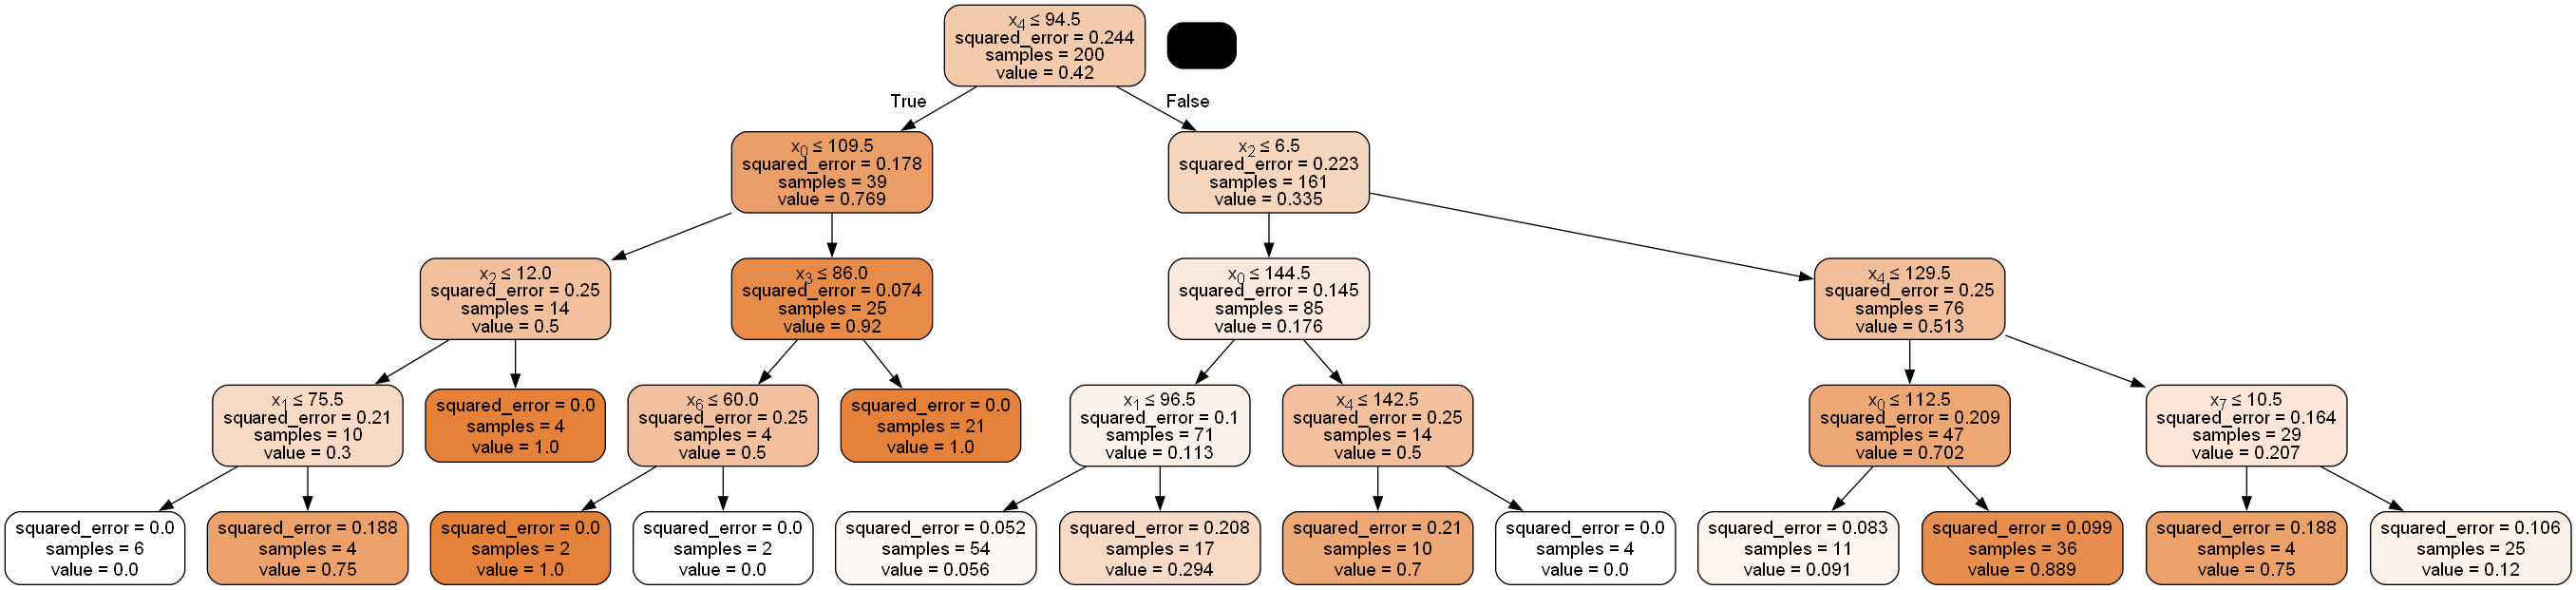

In [575]:
tree_cs = DecisionTreeRegressor(max_depth = 4).fit(X_train, y_train)

dot_data = StringIO()

export_graphviz(tree_cs, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=250000)

Mean Squared Error:  0.27716361927089567


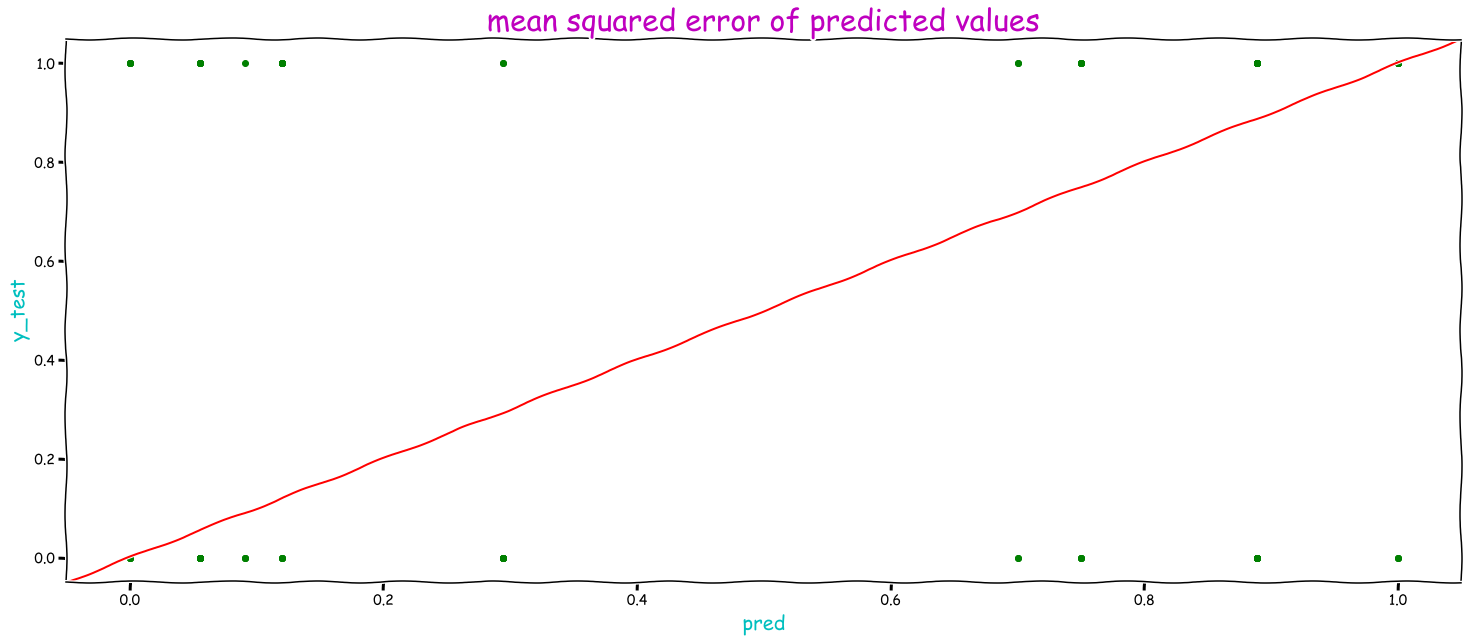

In [576]:
pred = tree_cs.predict(X_test)

plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(pred, y_test, label = 'medv', color='g')
plt.plot([0, 1], [0, 1], 'r', transform = plt.gca().transAxes)

plt.xlabel('pred', color='c', fontsize=20)
plt.ylabel('y_test', color='c', fontsize=20)
plt.title('mean squared error of predicted values', fontsize=30, color='m')

print("Mean Squared Error: ", mean_squared_error(y_test, pred))

**Pruning in this instance actually *increases* the test MSE.**

### 8.4.8.d.

Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important.

Mean Squared Error:  0.15865333333333334


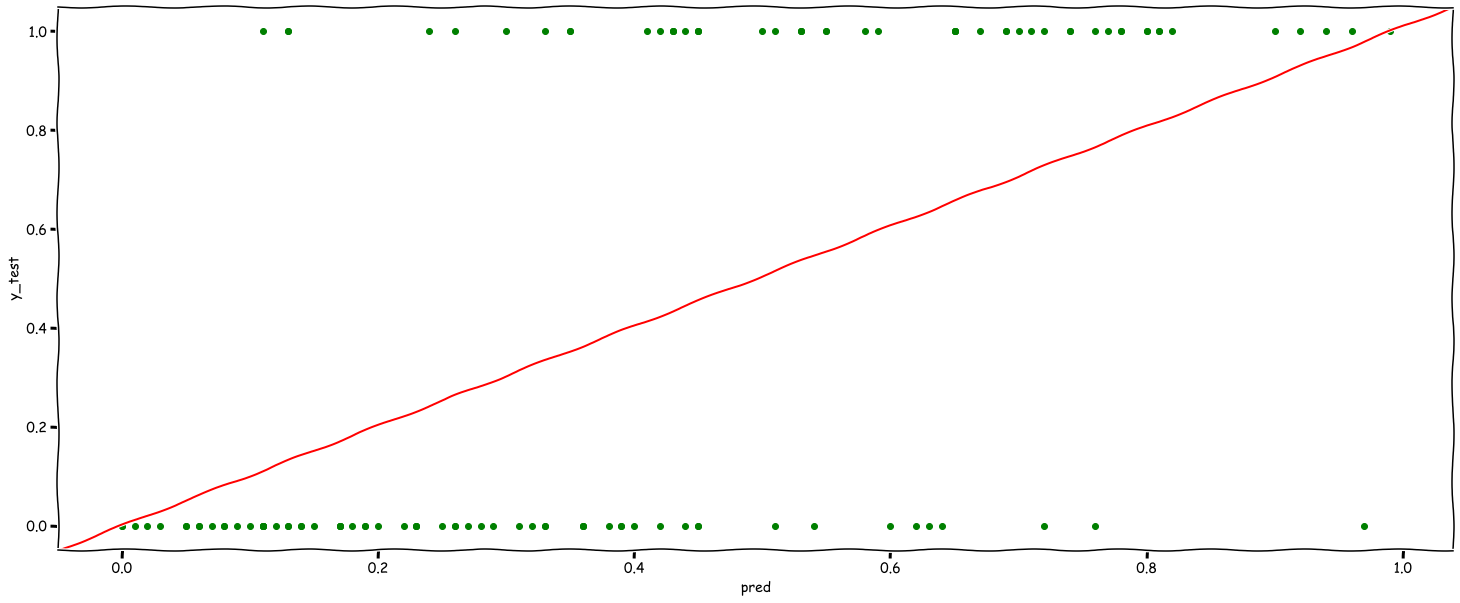

In [577]:
import warnings
warnings.filterwarnings('ignore')

bag_cs = RandomForestRegressor(max_features=10).fit(X_train, y_train)
bag_pred = bag_cs.predict(X_test)

plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(bag_pred, y_test, label = 'medv', color='g')
plt.plot([0, 1], [0, 1], 'r', transform = plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

print("Mean Squared Error: ", mean_squared_error(y_test, bag_pred))

**Bagging provides significant reduction in mean squared error over regression models.**

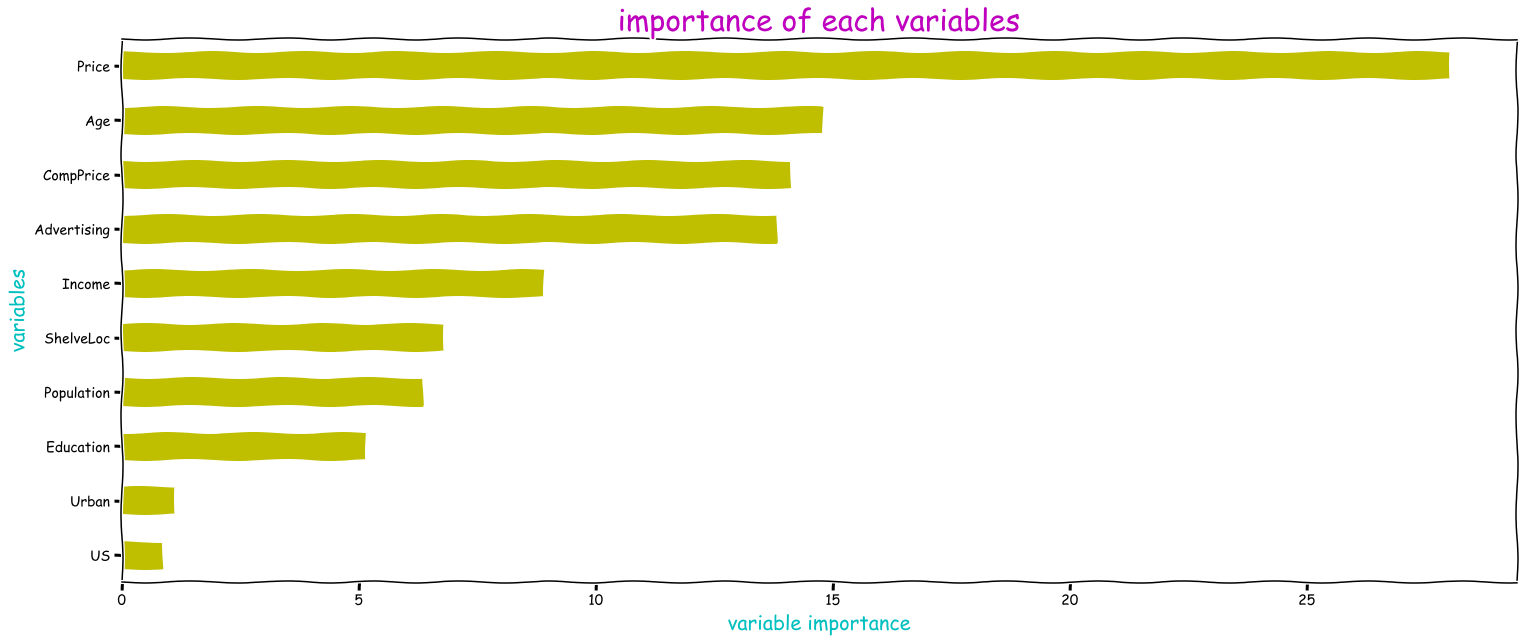

In [578]:
Importance = pd.DataFrame({'Importance': bag_cs.feature_importances_*100}, index = X.columns)
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'y')

plt.xkcd()
plt.xlabel('variable importance', fontsize=20, color='c')
plt.ylabel('variables', fontsize=20, color='c')
plt.title('importance of each variables', fontsize=30, color='m')
plt.gca().legend_ = None
fig = plt.gcf()
fig.set_size_inches(25, 10)

### 8.4.8.e. 

Use random forests to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important. Describe the efect of m, the number of variables considered at each split, on the error rate
obtained.

**$m$=4**

Mean Squared Error:  0.16202750000000002


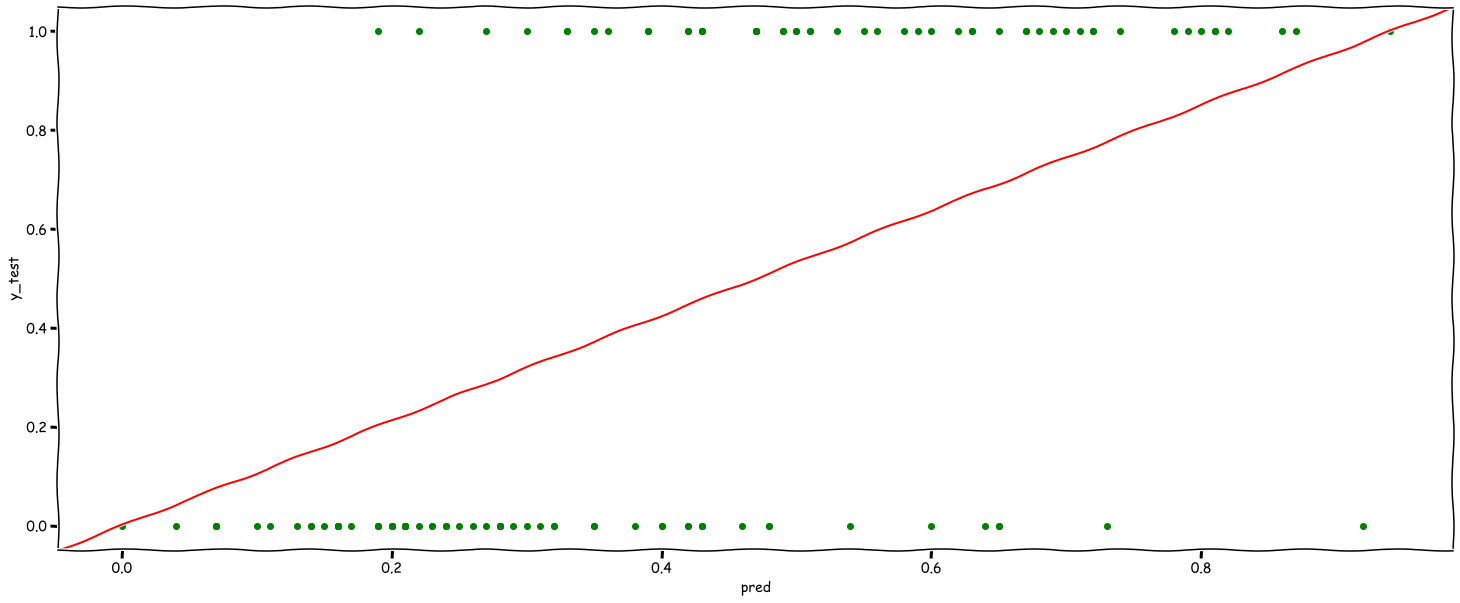

In [579]:
rf_cs = RandomForestRegressor(max_features=3).fit(X_train, y_train)

rf_pred = rf_cs.predict(X_test)

plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(rf_pred, y_test, label = 'medv', color='g')
plt.plot([0, 1], [0, 1], 'r', transform = plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

print("Mean Squared Error: ", mean_squared_error(y_test, rf_pred))

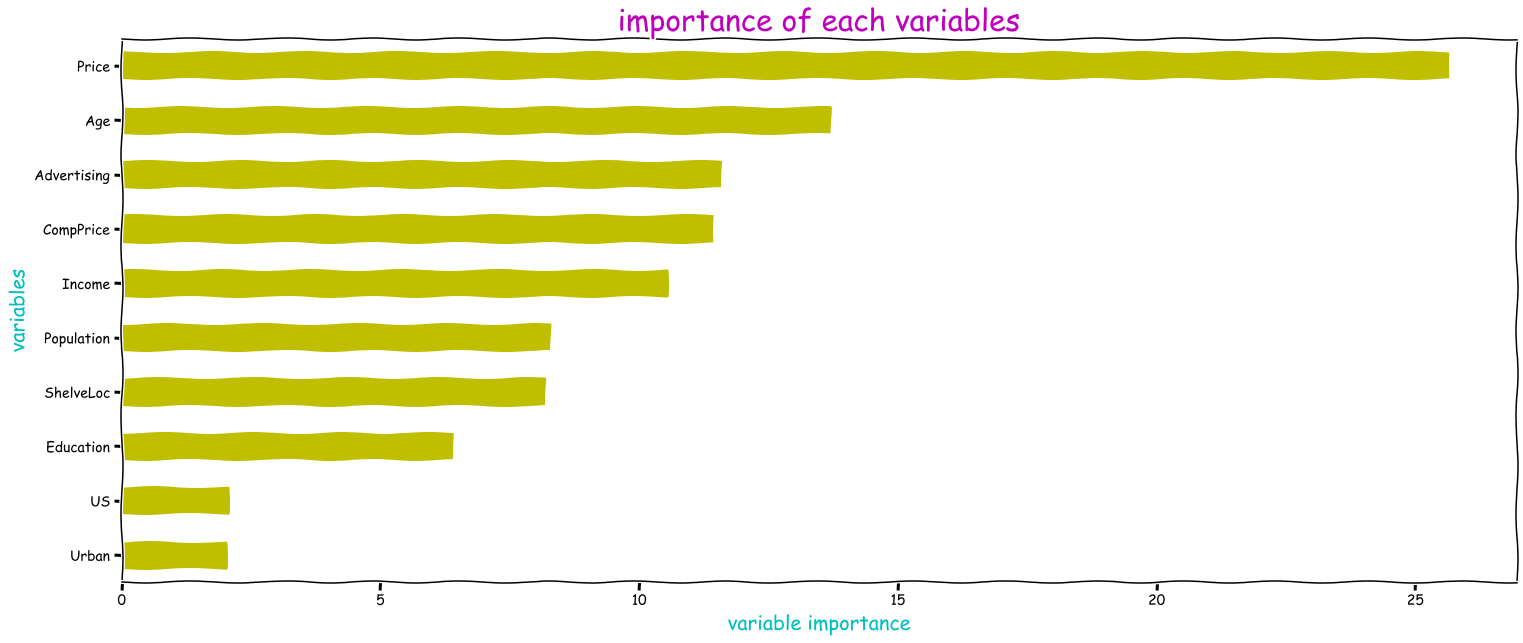

In [580]:
Importance = pd.DataFrame({'Importance': rf_cs.feature_importances_*100}, index = X.columns)
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'y')

plt.xkcd()
plt.xlabel('variable importance', fontsize=20, color='c')
plt.ylabel('variables', fontsize=20, color='c')
plt.title('importance of each variables', fontsize=30, color='m')
plt.gca().legend_ = None
fig = plt.gcf()
fig.set_size_inches(25, 10)

**Random forest decreases the test MSE.**

Text(0.5, 1.0, 'effect of number of variables on MSE')

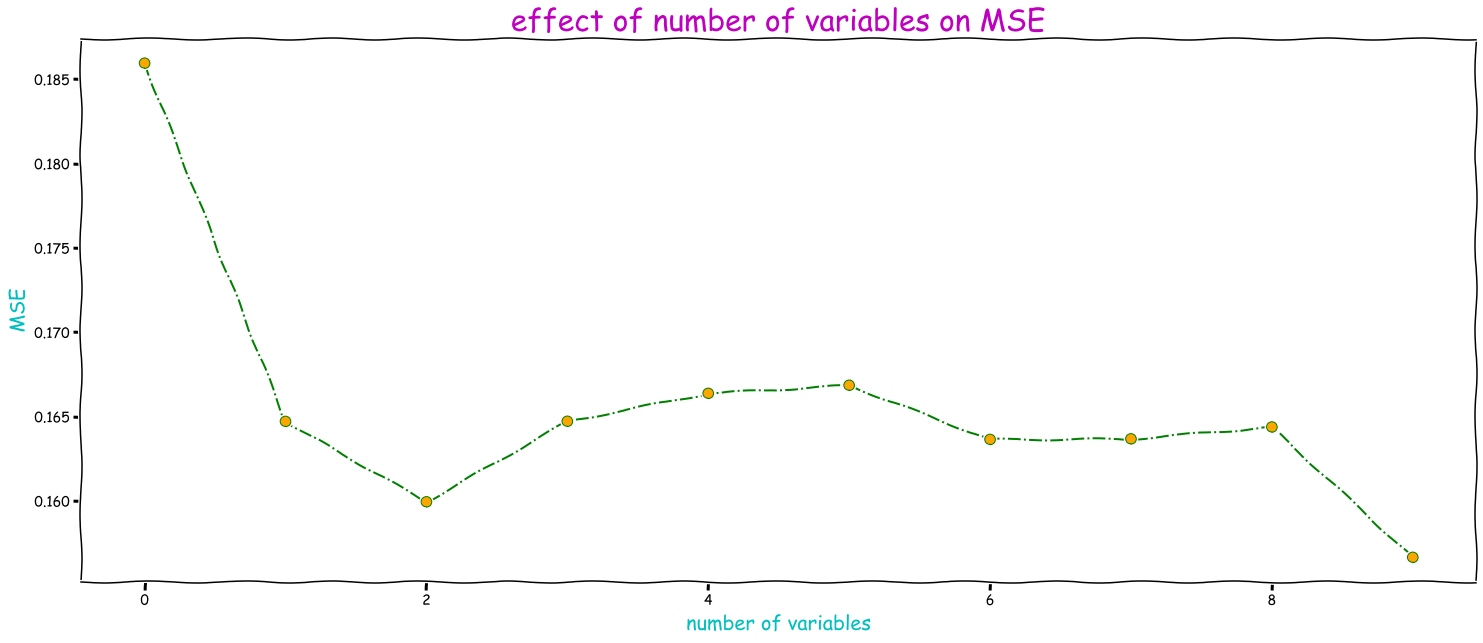

In [581]:
MSE = pd.DataFrame()

for k in range(1,11):
    rf_cs = RandomForestRegressor(max_features=k).fit(X_train, y_train)
    rf_pred = rf_cs.predict(X_test)
    mse = mean_squared_error(y_test, rf_pred)
    MSE = MSE.append([mse])
    
MSE.reset_index(drop=True, inplace=True)
plt.figure(figsize=(25, 10))
plt.plot(MSE, color='g', ls='-.', marker='o', markersize=10, markerfacecolor='orange')
plt.xlabel('number of variables', color='c', fontsize=20)
plt.ylabel('MSE', color='c', fontsize=20)
plt.title('effect of number of variables on MSE', color='m', fontsize=30)

### 8.4.8.f. 

Now analyze the data using BART (Bayesian Additive Regression Trees), and report the results.

In [582]:
# preprocessing steps
# df.Sales = df.Sales.map(lambda x: 0 if x<=8 else 1)
df.ShelveLoc = pd.factorize(df.ShelveLoc)[0]
df.Urban = df.Urban.map({'No':0, 'Yes':1})
df.US = df.US.map({'No':0, 'Yes':1})

**Changing m varies test MSE between approx. 0.15 to approx. 0.20.**

In [583]:
# split dataset into train, test
X = df.drop(['Sales'], axis = 1)
y = df.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [584]:
# instantiate BART()
bart_model = BART(random_state = 123, burnin = 5, ndraw = 20)

In [585]:
# fit BART()
bart_model.fit(X_train, y_train)

BART(burnin=5, ndraw=20, random_state=123)

In [586]:
# MSE
yhat_test = bart_model.predict(X_test.to_numpy())
np.mean((y_test - yhat_test)**2)

0.15739175115694667

In [587]:
# variable importance
var_inclusion = pd.Series(bart_model.variable_inclusion_.mean(0), index = X.columns).sort_values(ascending=False)
var_inclusion

Price          36.95
ShelveLoc      33.25
Advertising    33.05
US             29.60
Age            29.45
Income         29.40
Education      29.25
CompPrice      28.80
Urban          28.55
Population     26.55
dtype: float64

### Applied Exercise 8.4.9

This problem involves the OJ data set which is part of the ISLP package.

In [588]:
# import data
from ISLP import load_data
df = load_data("OJ")

#url = "C:/Users/david/Documents/Predictive Modeling/Data Files/OJ.csv"
#url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/OJ.csv"
#df = pd.read_csv(url, index_col='SlNo')
df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [589]:
df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [590]:
df.Purchase = df.Purchase.map(lambda x: 1 if x=='CH' else 0)
df.Store7 = df.Store7.map({'No': 0, 'Yes': 1})

In [591]:
df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,1,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,0,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,1,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   int64  
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1070 non-null   int64  
 3   PriceCH         1070 non-null   float64
 4   PriceMM         1070 non-null   float64
 5   DiscCH          1070 non-null   float64
 6   DiscMM          1070 non-null   float64
 7   SpecialCH       1070 non-null   int64  
 8   SpecialMM       1070 non-null   int64  
 9   LoyalCH         1070 non-null   float64
 10  SalePriceMM     1070 non-null   float64
 11  SalePriceCH     1070 non-null   float64
 12  PriceDiff       1070 non-null   float64
 13  Store7          1070 non-null   int64  
 14  PctDiscMM       1070 non-null   float64
 15  PctDiscCH       1070 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1070 non-null   i

### 8.4.9.a. 

Create a training set containing a random sample of 800 obervations, and a test set containing the remaining observations.

In [593]:
X = df.drop(columns='Purchase') # For this, I checked question 9.b. to find out the response variable
y = df.Purchase

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.747663551402, test_size=0.25233644859, random_state=42)

In [594]:
len(X_train)

800

### 8.4.9.b., 8.4.9.c., 8.4.9.d. & 8.4.9.e. 

Fitting a tree, plotting it and interpreting the results

(b) Fit a tree to the training data, with Purchase as the response and the other variables as predictors. What is the training error rate?

(c) Create a plot of the tree, and interpret the results. How many terminal nodes does the tree have?

(d) Use the export_tree() function to produce a text summary of the ftted tree. Pick one of the terminal nodes, and interpret the information displayed.

(e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?


In [595]:
tree = DecisionTreeClassifier(max_depth = 6).fit(X_train, y_train)
tree_score = tree.score(X_train, y_train)
print("Training error rate: ", round(1-tree_score, 2))

Training error rate:  0.11


In [596]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [597]:
tree_pred = tree.predict(X_test)
class_mat = pd.DataFrame(confusion_matrix(y_test, tree_pred).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
print(class_mat)

     No  Yes
No   72   23
Yes  39  136


In [598]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       111
           1       0.78      0.86      0.81       159

    accuracy                           0.77       270
   macro avg       0.77      0.75      0.76       270
weighted avg       0.77      0.77      0.77       270



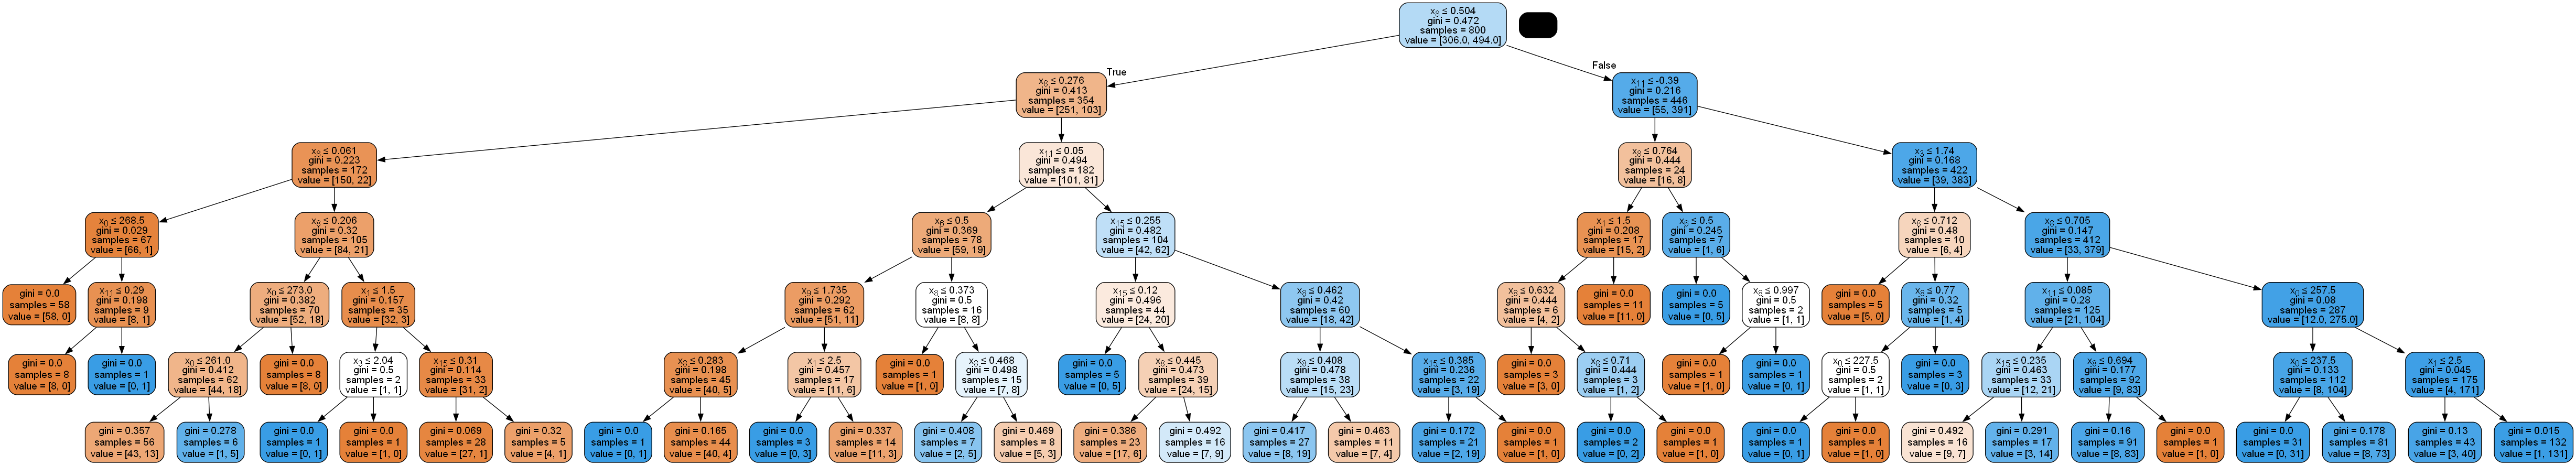

In [599]:
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**So, a classification tree produces the best result at a depth of 6 nodes, which yields 42 leaves. The training error rate is $\approx$0.11**

### 8.4.9.f., 8.4.9.g. & 8.4.9.h. 

Pruning and plotting the pruned tree

(f) Use cross-validation on the training set in order to determine the optimal tree size.

(g) Produce a plot with tree size on the x-axis and cross-validated classifcation error rate on the y-axis.

(h) Which tree size corresponds to the lowest cross-validated classifcation error rate?

In [600]:
SCORES = []
max_leafs_arr = range(2, 50)
for max_leafs in max_leafs_arr:
    regressionTree = DecisionTreeClassifier(max_leaf_nodes=max_leafs)
    sc = cross_val_score(regressionTree, X, y, cv=10, scoring="neg_mean_squared_error")
    SCORES.append((-sc.mean(), sc.std()))
SCORES = np.array(SCORES)

The best tree has 10 leafs.


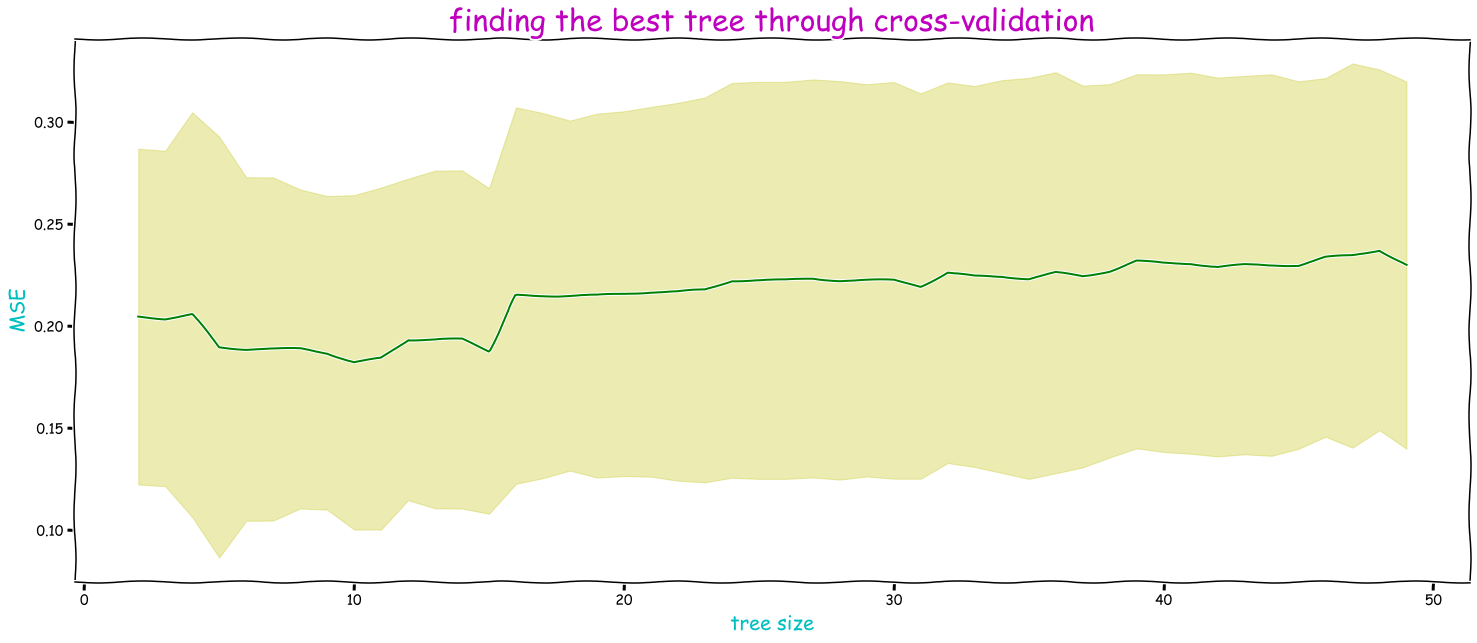

In [601]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(max_leafs_arr, SCORES[:,0], 'g')
plt.fill_between(max_leafs_arr, SCORES[:,0]+SCORES[:,1], SCORES[:,0]-SCORES[:,1], alpha=0.3, color='y')
plt.xlabel('tree size', fontsize=20, color='c')
plt.ylabel('MSE', fontsize=20, color='c')
plt.title('finding the best tree through cross-validation', fontsize=30, color='m')
best_min_leafs = max_leafs_arr[np.argmin(SCORES[:,0])]
print(f"The best tree has {best_min_leafs} leafs.")

**Therefore, a tree at $m$=10 leaves has the lowest cross-validated classification error rate.**

### 8.4.9.i., 8.4.9.j., & 8.4.9.k. 

Producing a tree using pruned data

(i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

(j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

(k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

In [602]:
pruned_tree = DecisionTreeClassifier(max_depth = 10)
pruned_tree.fit(X_train, y_train)
pruned_tree_score = pruned_tree.score(X_train, y_train)
print("Training error rate: ", round(1-pruned_tree_score, 2))

Training error rate:  0.03


In [603]:
pruned_tree_pred = pruned_tree.predict(X_test)
pruned_class_mat = pd.DataFrame(confusion_matrix(y_test, pruned_tree_pred).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
print(pruned_class_mat)

     No  Yes
No   74   38
Yes  37  121


In [604]:
print(classification_report(y_test, pruned_tree_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       111
           1       0.77      0.76      0.76       159

    accuracy                           0.72       270
   macro avg       0.71      0.71      0.71       270
weighted avg       0.72      0.72      0.72       270



**Therefore, pruned tree results in higher test error rate.**